# 대선 후보자별 긍정률 추정

## 대선 유망 후보자 데이터

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
# 형태소 분류 태그
from konlpy.tag import Okt


import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('data/data_candidates.csv')
df1

,Title,Date,ID,Comment_date,Comment,Candidate,Source
0,김부겸 “마지막 공직이라 생각”… 대선 출마설 부인,2021-05-07 10:55:00,정병렬,2021-05-07 14:46:43,<대선 출마설> 어떤 외눈박이의 헛소리 이겠지.,김부겸,조선일보
1,김부겸 “마지막 공직이라 생각”… 대선 출마설 부인,2021-05-07 10:55:00,이규태,2021-05-07 11:11:00,악취가 진동하는 엉망진창인 자신의 모습은 안보이나? 후보사퇴 하고 있는듯 없는듯이 ...,김부겸,조선일보
2,"김부겸 “검수완박은 일부 의원 의견... 문자폭탄, 민주적 방식 아냐“",2021-05-07 00:51:00,윤정삼,2021-05-07 07:55:49,김부겸 32번의 차량 압류 . . . 이렇게 법을 위반한 사람이 대한민국 총리가 된...,김부겸,조선일보
3,"김부겸 “검수완박은 일부 의원 의견... 문자폭탄, 민주적 방식 아냐“",2021-05-07 00:51:00,황성식,2021-05-07 05:10:51,부겸이 니는 부결이 정답이다,김부겸,조선일보
4,"김부겸 “검수완박은 일부 의원 의견... 문자폭탄, 민주적 방식 아냐“",2021-05-07 00:51:00,윤성철,2021-05-07 04:54:47,김부겸의 평소 고상한 품위 있는 언행 하던 사람이 상식이 파괴된 비도덕적이고 비윤리...,김부겸,조선일보
...,...,...,...,...,...,...,...
158529,"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,임인기,2021-03-16,황교안이 나라를이많큼말아먹구 파탄냈으면 평생니가할일은다한거다 제발 더이상나라망치지말...,황교안,YouTube
158530,"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,안태준,2021-03-16,윤석열 .힘내시고.화이팅입니다.,황교안,YouTube
158531,"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,이희만,2021-03-16,황교안 대표 가 보수다,황교안,YouTube
158532,"[여랑야랑]윤석열 ★의 순간? 벌의 순간? / 황교안, 의문의 1패? | 뉴스A",2021-03-05,박영칠,2021-03-16,황교안정직하고깨끋한애국자 불평하지말라 똑똑한것홍준표의원 검찰들이않다 주님준비된대통령...,황교안,YouTube


### 유튜브 비중 조절

In [3]:
tmp = df1['Source'].value_counts()
tmp

YouTube    94019
중앙일보       15191
동아일보       14553
경향신문       12505
한겨레         9520
MBC         8470
조선일보        3623
JTBC         653
Name: Source, dtype: int64

In [4]:
tmp.sum() # 총 데이터 개수

158534

In [5]:
tmp[['동아일보','중앙일보','조선일보']].sum() # 보수언론 합

33367

In [6]:
tmp[['경향신문','한겨레','MBC','JTBC']].sum() # 진보언론 합

31148

In [7]:
# 출처 유튜브를 좀 조정하기
youtube_list = df1.query( 'Source == "YouTube"').index.to_list()
print(len(youtube_list))

# 비복원추출. 유튜브 비중을 3만개로 맞추려고 6만개 제거하기 위한 과정
random_youtube_list = np.random.choice(youtube_list, size=62871, replace=False)
random_youtube_list

94019


array([ 88968, 150513, 151982, ..., 105246,  87984,  73277])

In [8]:
tmp # 원래 데이터의 언론사별 비율

YouTube    94019
중앙일보       15191
동아일보       14553
경향신문       12505
한겨레         9520
MBC         8470
조선일보        3623
JTBC         653
Name: Source, dtype: int64

In [9]:
df1 = df1.drop( index=random_youtube_list ) # 6만개 제거한 데이터를 df1으로 두기

In [11]:
df1['Source'].value_counts()

YouTube    31148
중앙일보       15191
동아일보       14553
경향신문       12505
한겨레         9520
MBC         8470
조선일보        3623
JTBC         653
Name: Source, dtype: int64

### 기사제목_댓글내용 가져오기

In [10]:
df1['Comment']

0                                <대선 출마설> 어떤 외눈박이의 헛소리 이겠지.
1         악취가 진동하는 엉망진창인 자신의 모습은 안보이나? 후보사퇴 하고 있는듯 없는듯이 ...
2         김부겸 32번의 차량 압류 . . . 이렇게 법을 위반한 사람이 대한민국 총리가 된...
3                                           부겸이 니는 부결이 정답이다
4         김부겸의 평소 고상한 품위 있는 언행 하던 사람이 상식이 파괴된 비도덕적이고 비윤리...
                                ...                        
158517                                       저것들은 공산주의자들인가?
158525         온국민은, 중범죄집단 문정권에 결사 반대하고국민일꾼 윤석열을 전심으로 성원한다👍
158527                                        민주당 사기꾼니들이나잘해
158530                                    윤석열 .힘내시고.화이팅입니다.
158531                                         황교안 대표 가 보수다
Name: Comment, Length: 95663, dtype: object

### 전처리
- 한글 정규화

In [11]:
# 정규식
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [12]:
df1['Comment'] = df1['Comment'].apply(lambda x: text_cleaning(x))

In [13]:
df1['Comment']

0                                   대선 출마설 어떤 외눈박이의 헛소리 이겠지
1         악취가 진동하는 엉망진창인 자신의 모습은 안보이나 후보사퇴 하고 있는듯 없는듯이 조...
2         김부겸 번의 차량 압류    이렇게 법을 위반한 사람이 대한민국 총리가 된다고   ...
3                                           부겸이 니는 부결이 정답이다
4         김부겸의 평소 고상한 품위 있는 언행 하던 사람이 상식이 파괴된 비도덕적이고 비윤리...
                                ...                        
158517                                        저것들은 공산주의자들인가
158525           온국민은 중범죄집단 문정권에 결사 반대하고국민일꾼 윤석열을 전심으로 성원한다
158527                                        민주당 사기꾼니들이나잘해
158530                                       윤석열 힘내시고화이팅입니다
158531                                         황교안 대표 가 보수다
Name: Comment, Length: 95663, dtype: object

## 기존 모델의 CounterVectorizer 생성

In [14]:
df = pd.read_csv('./data/재보궐선거댓글데이터_최종_유튜브수정_0429.csv')
df

,제목,날짜,작성일,댓글,출처,"지역(서울:1, 부산:2)","정당(1:더불어민주당,2:국민의힘)","정당평가(부정;0, 긍정:1)",후보(기호 순),"후보평가(부정;0, 긍정:1)",제목댓글
0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-12 19:13:00,철수야! 뜸 들이지 말고 애국하는 마음으로 물러서라~~~,조선일보,NaN,NaN,NaN,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 철수야! 뜸 들이..."
1,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-09 13:49:00,박영선은 정동영이 얻은 36프로선에 머무를것. 4.7.이후 OOO정권은 몰락의 길 ...,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 박영선은 정동영이..."
2,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-07 14:42:00,빵선이가서울시장되면서울은공산국가수도제2의평양이될것이다,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 빵선이가서울시장되..."
3,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-07 14:38:00,서울시장후보더듬당박빵선이는절대로서울시장을할수없다이유는가족은미국.영국에 영주권자이므로...,조선일보,1.0,1.0,0.0,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 서울시장후보더듬당..."
4,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결?",2021-03-07 05:57:00,2021-03-07 14:02:00,부산은오거돈선거이고 오거돈치부선거아닌가 오거돈에 성추해으로 생긴선거가 가독도신공항은...,조선일보,2.0,1.0,0.0,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 부산은오거돈선거이..."
...,...,...,...,...,...,...,...,...,...,...,...
144134,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:47:00,국민의힘 찍지 말라고 이 뉴스가 나온거임\r\n내냔에 국민의힘 찍을라 했드만 망했다...,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...
144135,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:41:00,굳이 일본과 해저터널 해야되는 이유가 없은이유\r\n-일본은고속도로비가 비싸다\r\...,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...
144136,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:38:00,도랏구나. 열도는 걍 갈라파고스로 남겨 둬라. 재난 난민 넘어 오면 귀찮다.,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...
144137,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토해야”,2021-04-06 21:56:00,2021-04-06 22:32:00,이걸 왜 하지? 우리한테 아무런 의미가 없는데,경향신문,NaN,NaN,NaN,NaN,NaN,[논설위원의 단도직입]“한·일해저터널 경제성 없지만…동북아 경제권 차원서 장기 검토...


In [15]:
# 제목과 댓글은 '제목 댓글 컬럼' 존재로 삭제
# 기사가 작성된 날짜는 삭제
df = df.drop( columns=['제목','날짜','댓글'])
df.head(2)

,작성일,출처,"지역(서울:1, 부산:2)","정당(1:더불어민주당,2:국민의힘)","정당평가(부정;0, 긍정:1)",후보(기호 순),"후보평가(부정;0, 긍정:1)",제목댓글
0,2021-03-12 19:13:00,조선일보,NaN,NaN,NaN,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 철수야! 뜸 들이..."
1,2021-03-09 13:49:00,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 박영선은 정동영이..."


In [16]:
# 컬럼 이름 영어로 변경
cols = ['date','press','area', 'party','party_eval', 
        'candidate','candidate_eval','title_comment']
df.columns = cols
df.head()

,date,press,area,party,party_eval,candidate,candidate_eval,title_comment
0,2021-03-12 19:13:00,조선일보,NaN,NaN,NaN,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 철수야! 뜸 들이..."
1,2021-03-09 13:49:00,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 박영선은 정동영이..."
2,2021-03-07 14:42:00,조선일보,1.0,NaN,NaN,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 빵선이가서울시장되..."
3,2021-03-07 14:38:00,조선일보,1.0,1.0,0.0,1.0,0.0,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 서울시장후보더듬당..."
4,2021-03-07 14:02:00,조선일보,2.0,1.0,0.0,NaN,NaN,"[재보궐 D-31] 부산 김영춘 vs 박형준, 서울도 양자 대결? 부산은오거돈선거이..."


In [17]:
# 둘 중 하나라도 값이 있으면 인덱스 추출

# 값을 담을 리스트
A = []
B =[]
A_B = []

for p, c in zip( df['party_eval'].items(), df['candidate_eval'].items()):
    # 정당평가 有, 후보평가 無
    if (p[1] in [1.0,0.0]) & (c[1] not in [1.0,0.0]):
#         print(p[0], p[1])
        A.append(p[0])
    
    # 정당평가 無, 후보평가 有
    elif (p[1] not in [1.0,0.0]) & ( c[1] in [1.0,0.0]):
#         print(p[1], c[1])
#         print(p[0], c[0])
        B.append(c[0])
    
    # 정당평가 有, 후보평가 有
    elif (p[1] in [1.0,0.0]) & (c[1] in [1.0,0.0]):
#         print(p[1], c[1])
        A_B.append(p[0])
        
print(len(A), len(B), len(A_B))
print( len(A)+len(B)+len(A_B)) # 가용한 총 데이터수

1780 2330 263
4373


In [18]:
# 리스트를 하나로 묶기
index = A+ B + A_B
len(index)

4373

In [19]:
# 둘 중 하나라도 있는 값만을 데이터 프레임으로 형성, 혹시 모를 NaN값 삭제
index2 = df.iloc[index][['party_eval','candidate_eval']].dropna(how='all').index
df2 = df.iloc[index2]
print(df2.shape)

# 인덱스 재배열
df2.reset_index(inplace=True) 

(4373, 8)


In [20]:
# X-y값으로 나누기
X = df2['title_comment']

# 후보자 평가 nan값을 정당 평가로 채우기
y = df2['candidate_eval'].fillna( df2['party_eval'] )

In [21]:
# 위에서 분류했던 X,y 합치기
df3 = pd.concat([X,y], axis=1)

# 컬럼 이름 변경
df3 = df3.rename( columns={'candidate_eval': 'y'} )

df3.shape

(4373, 2)

In [22]:
# 정규식
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [23]:
# 한글 외 문자는 제거
df3['title_comment'] = df3['title_comment'].apply( lambda x: text_cleaning(x) )

In [24]:
# copy
df4 = df3.copy()

# 후보이름, 당명을 대체
df4['title_comment'] = df4['title_comment'].str.replace('박영선|오세훈|김영춘|박형준|영선|세훈|형준|영춘|5세훈', '후보')
df4['title_comment'] = df4['title_comment'].str.replace('더불어민주당|국민의힘|더불어 민주당|국민의 힘|국힘|더불어|민주당', '정당')
df4

C:\Users\master4\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\master4\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,title_comment,y
0,재보궐 부산 후보 후보 서울도 양자 대결 부산은오거돈선거이고 오거돈치부선거아닌가...,0.0
1,재보궐 부산 후보 후보 서울도 양자 대결 일단 일자리와 경제를 말아드신 여당 빼...,0.0
2,재보궐 부산 후보 후보 서울도 양자 대결 수십조 세금을 평가순위 위인 가덕도에 ...,0.0
3,재보궐 부산 후보 후보 서울도 양자 대결 박원순의 성폭력 자살을 공수처에 수사의...,0.0
4,재보궐 부산 후보 후보 서울도 양자 대결 이번 보궐선거는 임기가 년남짓이다 내년...,1.0
...,...,...
4368,나경원 대세론 꺾은 후보임기 못마친 죄 갚겠다 울먹 쟤 쥐새끼 똘마니야벌써 잊는거냐...,0.0
4369,나경원 대세론 꺾은 후보임기 못마친 죄 갚겠다 울먹 이런자가 시장 후보라니 국민의짐...,0.0
4370,나경원 대세론 꺾은 후보임기 못마친 죄 갚겠다 울먹 그럼 저 치가 아이들 점심을 어...,0.0
4371,나경원 대세론 꺾은 후보임기 못마친 죄 갚겠다 울먹 정권심판이라이명박 박근혜정권때는...,0.0


In [25]:
def get_pos(x) :
    tagger = Okt() # Okt로 형태소 분리하기
    pos = tagger.pos(x) 
    results = [] # 형태소를 담을 리스트
    for i in pos:
        if i[1] != 'Josa': # 조사는 빼버리기
            results.append(f'{i[0]}/{i[1]}') #'단어/품사'의 형태로 리스트에 추가
        else:
            pass
    return results

In [26]:
# 단어당 몇개씩 들어 있는지에 대한 벡터를 생성
from sklearn.feature_extraction.text import CountVectorizer

index_vectorizer2 = CountVectorizer(tokenizer= lambda x : get_pos(x))
X = index_vectorizer2.fit_transform(df4['title_comment'].tolist())

## 기존 모델과 Tf-Idf Vecotrizer 불러오기

In [27]:
# 감성분석 모델 불러오기
with open('model/pos_neg_logi_model2_0409.dat', 'rb') as fp:
    new_model = pickle.load(fp)
print('출력 완료')

출력 완료


C:\Users\master4\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [28]:
# Tf-Idf Vectorizer 불러오기
with open('model/tfidf_vectorizer2_0409.dat', 'rb') as fp:
    new_tfidf_vectorizer = pickle.load(fp)
print('출력 완료')

출력 완료


C:\Users\master4\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## 예측하기
-  3월 1일 ~ 5월 14일

In [29]:
total_X2 = df1['Comment']

In [30]:
# CounterVectorrizer는 다시 fit시키는 것이 아니라 transform만 시키는 것
X2 = index_vectorizer2.transform(total_X2.to_list())

In [31]:
# tf-idf는 새로 생성하는 것이 아니라 학습시킨 td-idf를 저장하여 사용하는 것
X2 = new_tfidf_vectorizer.transform(X2)

In [32]:
# 예측하기
y_pred2 = new_model.predict(X2)
y_pred2

array([0., 0., 0., ..., 0., 1., 1.])

In [36]:
target_df2 = df1[['Comment','Candidate']]
target_df2['pred_sentiment'] = y_pred2

C:\Users\master4\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
target_df2

,Comment,Candidate,pred_sentiment
0,대선 출마설 어떤 외눈박이의 헛소리 이겠지,김부겸,0.0
1,악취가 진동하는 엉망진창인 자신의 모습은 안보이나 후보사퇴 하고 있는듯 없는듯이 조...,김부겸,0.0
2,김부겸 번의 차량 압류 이렇게 법을 위반한 사람이 대한민국 총리가 된다고 ...,김부겸,0.0
3,부겸이 니는 부결이 정답이다,김부겸,0.0
4,김부겸의 평소 고상한 품위 있는 언행 하던 사람이 상식이 파괴된 비도덕적이고 비윤리...,김부겸,0.0
...,...,...,...
158517,저것들은 공산주의자들인가,황교안,0.0
158525,온국민은 중범죄집단 문정권에 결사 반대하고국민일꾼 윤석열을 전심으로 성원한다,황교안,0.0
158527,민주당 사기꾼니들이나잘해,황교안,0.0
158530,윤석열 힘내시고화이팅입니다,황교안,1.0


In [38]:
a = target_df2.groupby('Candidate').mean().loc[['윤석열', '이재명', '이낙연', '홍준표', '안철수', '정세균',
                                                '유승민', '심상정', '추미애', '황교안', '김부겸']]
a['pred_sentiment']

Candidate
윤석열    0.091251
이재명    0.073972
이낙연    0.048103
홍준표    0.134055
안철수    0.083936
정세균    0.055642
유승민    0.078120
심상정    0.041184
추미애    0.068350
황교안    0.055490
김부겸    0.063415
Name: pred_sentiment, dtype: float64

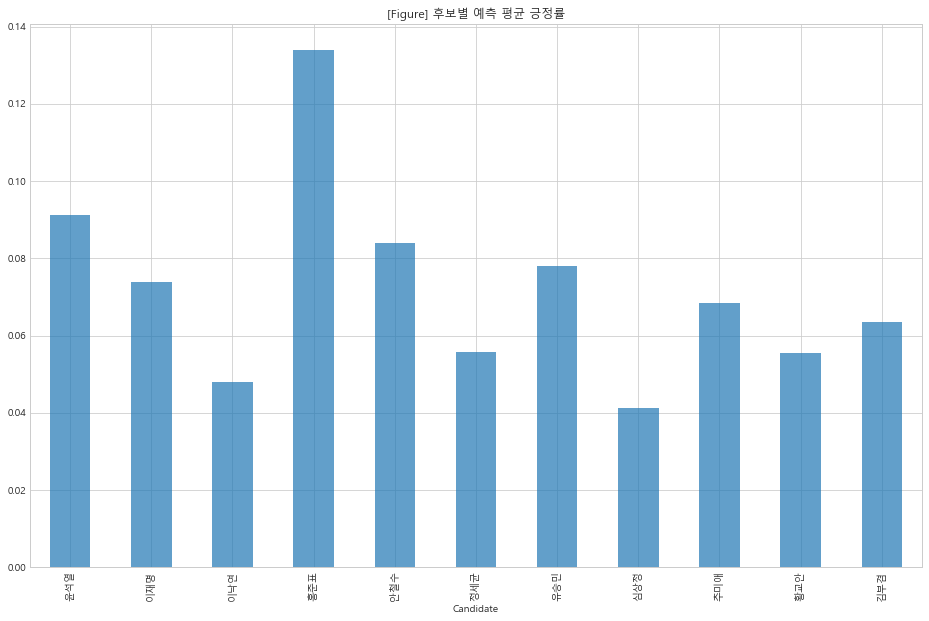

In [39]:
plt.figure( figsize=(16,10))
a['pred_sentiment'].plot(kind='bar',  alpha=0.7)
plt.title('[Figure] 후보별 예측 평균 긍정률')
plt.show()